## Label Useful Images

We load images from a source folder and inspect them.

From here we can label them as good/bad/maybe or zoomed which determines how we want to use them later down in the data pipeline.

For example, good and maybe images can be used in datasets, while bad or zoomed will most likely be discarded.

In [2]:
import sys
sys.path.append('../')

In [95]:
from importlib import reload
import libs.render as render
import libs.importing as importing
from glob import glob
import os
import cv2
import numpy as np
import re

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

source_dir = './orig_data/'
files = glob(os.path.join(source_dir, '**/**','*NBI.mat'))
print(len(files))

48


./orig_data/pat. 9-18/Pat. 18 LÑsion 1/Pat. 18 NBI.mat
None
[[array([[array([], shape=(0, 0), dtype='<U1')]], dtype=object)]]
[[array([[array([[443.23453094, 331.64471058],
       [441.59780439, 400.38722555],
       [533.25449102, 495.31736527],
       [615.09081836, 483.86027944],
       [631.45808383, 382.38323353],
       [569.26247505, 302.18363273],
       [443.23453094, 330.00798403],
       [443.23453094, 331.64471058]])]], dtype=object)]]
./orig_data/pat. 9-18/Pat. 18 LÑsion 1/Pat. 18 NBI.mat


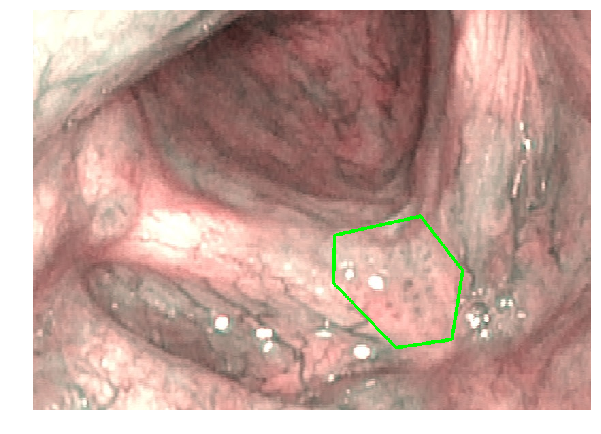

In [101]:
reload(importing)

idx = 47
pat_lesion_number = re.compile('L.*sion', re.IGNORECASE)
print(files[idx])
res = pat_lesion_number.match(files[idx])
print(res)

data = importing.extract_data_from_mat_file(files[idx])
img = data['bild'][0][0]
img = img.astype(np.uint8).copy()
print(data['info_2_contours'])
print(data['konturen'])
#print(data)
k = data['konturen'][0][0][0][0]
k = k.astype(np.int32)
print(files[idx])

render.plot_image(render.draw_roi_on_image(img, k))
